In [1]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [5]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [2]:
#Pre-trained model on COCO dataset
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\swara/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-12 Python-3.10.11 torch-1.12.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img = 'https://images.hindustantimes.com/auto/img/2024/03/08/600x338/Pakistan_Rowdy_Riders_1709869745622_1709869872815.jpeg'

In [5]:
result = model(img)
result.print()

image 1/1: 337x600 9 persons, 2 bicycles, 1 car, 8 motorcycles, 2 trucks
Speed: 465.1ms pre-process, 44.3ms inference, 83.7ms NMS per image at shape (1, 3, 384, 640)


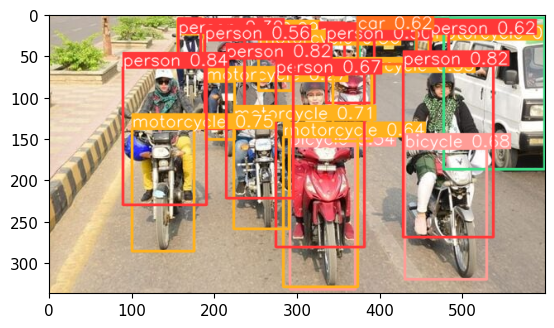

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

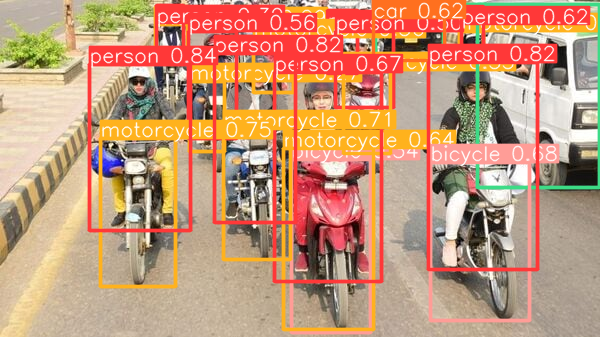

In [7]:
result.show()

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame=cap.read()
    
    result=model(frame)
    
    cv2.imshow('yolo', np.squeeze(result.render()))
    
    if cv2.waitKey(10) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


AttributeError: 'NoneType' object has no attribute 'shape'

In [8]:
import uuid
import os
import time

In [9]:
IMAGES_PATH =os.path.join('data','images')
labels=('Helmet', 'Human head', 'Motorcycle', 'Vehicle registration plate')
number_images=5

In [10]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [6]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

^C


In [16]:
#Custom model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\swara/.cache\torch\hub\master.zip


requirements: Ultralytics requirements ['pillow>=10.3.0', 'requests>=2.32.2', 'tqdm>=4.66.3', 'ultralytics>=8.2.34', 'setuptools>=70.0.0'] not found, attempting AutoUpdate...
  Obtaining dependency information for pillow>=10.3.0 from https://files.pythonhosted.org/packages/37/f8/bef952bdb32aa53741f58bf21798642209e994edc3f6598f337f23d5400a/pillow-10.4.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for requests>=2.32.2 from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm>=4.66.3 from https://files.pythonhosted.org/packages/48/5d/acf5905c36149bbaec41ccf7f2b68814647347b72075ac0b1fe3022fdc73/tqdm-4.66.5-py3-none-any.whl.metadata
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
  Obtaining dependency information for ultralytics>=8.2.34 from https://files.pythonhosted.org/packages/74/72/7365c92cca8a00fbd

YOLOv5  2024-9-24 Python-3.10.11 torch-1.12.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [17]:
img = os.path.join('data', 'images', '4a11e2446df66145.jpg')

In [18]:
img = 'https://cdn.dnaindia.com/sites/default/files/styles/full/public/2019/09/14/867723-traffic-violations-091419.jpg'

In [19]:
results = model(img)

In [20]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 720x1280 2 Helmets, 4 Human heads, 3 Motorcycles
Speed: 192.1ms pre-process, 14.1ms inference, 64.2ms NMS per image at shape (1, 3, 384, 640)

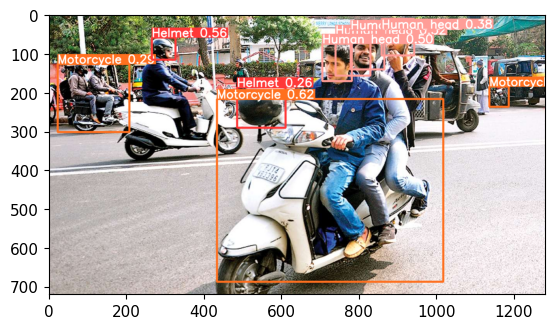

In [21]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [22]:
!pip install pytesseract



[notice] A new release of pip is available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import pytesseract
import urllib.request

In [24]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [25]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ('Helmet', 'Human head', 'Motorcycle', 'Vehicle registration plate')
number_images = 5

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

!MHOZEP 154.



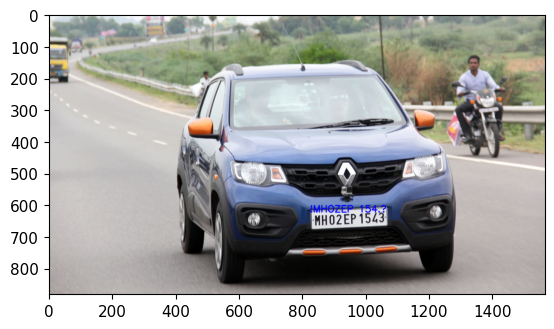

In [26]:
img = 'https://img.thedailybeast.com/image/upload/c_crop,d_placeholder_euli9k,h_1440,w_2560,x_0,y_0/dpr_1.5/c_limit,w_1044/fl_lossy,q_auto/v1499473766/170707-Neidermeyer-india-car-tease_z6ld4i'

results = model(img)

boxes = results.xyxy[0].cpu().numpy()

with urllib.request.urlopen(img) as url:
    s = url.read()
arr = np.asarray(bytearray(s), dtype=np.uint8)
img_data = cv2.imdecode(arr, -1)

for box in boxes:
    if labels[int(box[5])] == 'Vehicle registration plate':
        region = img_data[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
        
        ratio = region.shape[1] / region.shape[0] 
        model_height = 32  
        img = cv2.resize(region, (int(model_height*ratio), model_height), interpolation=cv2.INTER_LINEAR)
        
        ocr_result = pytesseract.image_to_string(img)
        
        print(ocr_result)
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

        cv2.putText(img_data, ocr_result, (int(box[0]), int(box[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
plt.show()



PMHOZEP 1543



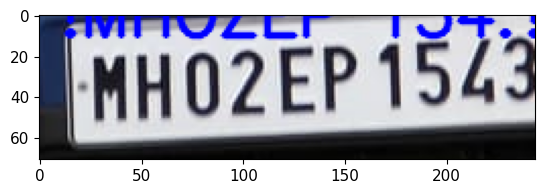

In [27]:
scores = boxes[:, 4]

best_index = np.argmax(scores)

for i, box in enumerate(boxes):
    if i == best_index:
        if labels[int(box[5])] == 'Vehicle registration plate':
            margin = 10  
            box = [max(0, box[0]-margin), max(0, box[1]-margin), min(img_data.shape[1], box[2]+margin), min(img_data.shape[0], box[3]+margin)]
            
            region = img_data[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
            
            gray = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
            
            _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            
            ratio = thresh.shape[1] / thresh.shape[0]  
            model_height = 32  
            img = cv2.resize(thresh, (int(model_height*ratio), model_height), interpolation=cv2.INTER_LINEAR)
            
            custom_config = r'--oem 3 --psm 6'
            ocr_result = pytesseract.image_to_string(img, config=custom_config)
            
            print(ocr_result)
            
            text_position = (region.shape[1]//2, region.shape[0]//2)
#             cv2.putText(region, ocr_result, text_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

            plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
            plt.show()


In [29]:
# Accuracy
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

average_mAP_05 = df['metrics/mAP_0.5'].mean()
average_mAP_05095 = df['metrics/mAP_0.5:0.95'].mean()

print(f'Average mAP@0.5: {average_mAP_05 * 100}%')
print(f'Average mAP@0.5:0.95: {average_mAP_05095 * 100}%')


NameError: name 'df' is not defined